### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

### **Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from collections import OrderedDict
from functools import lru_cache
from sklearn.model_selection import train_test_split

np.random.seed(2022)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv', parse_dates=[2])
print(df.shape)
df.head()

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-

**Observation:** It seems like the columns with names containing "Column" don't provide any insight regarding the dataset. There are no null values in the remaining columns.

In [ ]:
df.describe(include='all', datetime_is_numeric=1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3525.500000,NaN,2016-11-20 05:13:52.672340224,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
min,1.000000,NaN,2012-07-15 02:51:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,NaN,2016-03-15 16:52:45,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,NaN,2017-11-18 01:19:00,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,NaN,2018-03-09 05:26:45,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,NaN,2018-06-13 01:12:00,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


**Observation:** We observe from first 5 rows of the data and summary that $num\_reactions=num\_likes+num\_loves+num\_wows+num\_hahas+num\_sads+num\_angrys$

In [ ]:
df.status_type.value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

We observe that a status can be either status, video, photo and link. Photo-type status dominate the list while link-type status are the least frequent.

In [ ]:
le = LabelEncoder() # encode status type using LabelEncoder
le.fit(df.status_type)
new_status_code = le.transform(df.status_type)
df.status_type = pd.Series(new_status_code)

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


We have finished the endoing part. Now we will drop the last 4 columns as they provide no useful information.

In [ ]:
df_dropped = df.drop(['Column1','Column2','Column3','Column4'], axis=1)
print(df_dropped.shape)
df_dropped.head()

(7050, 12)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


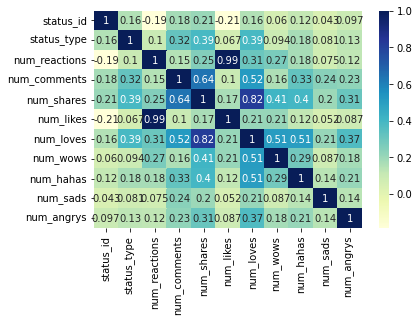

In [ ]:
sns.heatmap(df_dropped.drop(['status_published'], axis=1).corr(), \
            robust=True, annot=True, cmap="YlGnBu") # we dropped the status published column to avoid errors

We observe that the reactions are in way correlated with one another or with total number of reactions so we will drop them too. Number of shares seem to be correlated with other features, especially number of comments.

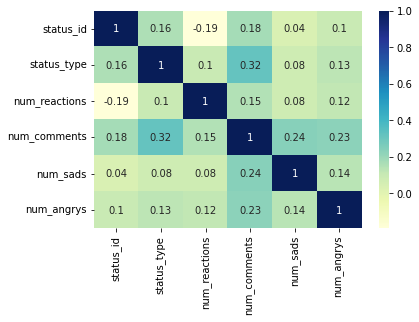

In [ ]:
sns.heatmap(np.round(df_dropped.drop(['status_published', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_shares'], axis=1).corr(),2),
            robust=True, annot=True, cmap="YlGnBu")

We now have reduced multicollineary, so we consider dropping number of likes, loves, wows and hahas reaction as number of shares.

We will now process the status_published column to make it more useful for our analysis.

In [ ]:
year = df_dropped.status_published.dt.year
month = df_dropped.status_published.dt.month
day = df_dropped.status_published.dt.day
hour = df_dropped.status_published.dt.hour
minute = df_dropped.status_published.dt.minute
# we wont extract seconds as they all same
# df_dropped.status_published.dt.second.value_counts()
df_dropped.insert(3,'status_minute', minute)
df_dropped.insert(3,'status_hour', hour)
df_dropped.insert(3,'status_year', year)
df_dropped.insert(3,'status_month', month)
df_dropped.insert(3,'status_day', day)

In [ ]:
df_processed = df_dropped.drop(['status_published'], axis=1)
df_processed.set_index('status_id', inplace=True)
df_processed.head()

,status_type,status_day,status_month,status_year,status_hour,status_minute,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,,,,,
1,3,22,4,2018,6,0,529,512,262,432,92,3,1,1,0
2,1,21,4,2018,22,45,150,0,0,150,0,0,0,0,0
3,3,21,4,2018,6,17,227,236,57,204,21,1,1,0,0
4,1,21,4,2018,2,29,111,0,0,111,0,0,0,0,0
5,1,18,4,2018,3,22,213,0,0,204,9,0,0,0,0


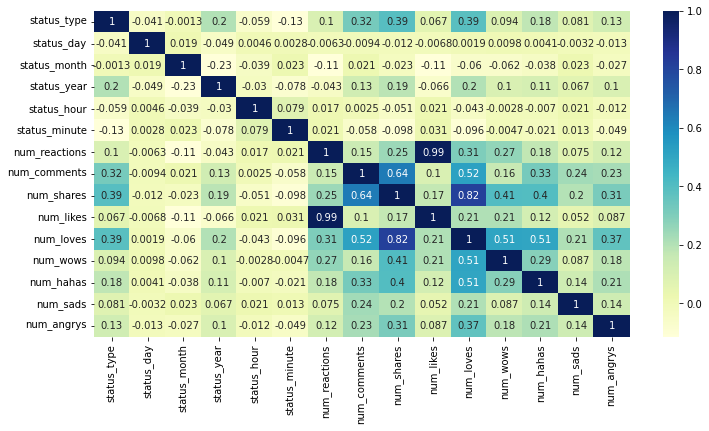

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_processed.corr(), robust=True, annot=True, cmap="YlGnBu")
plt.show()

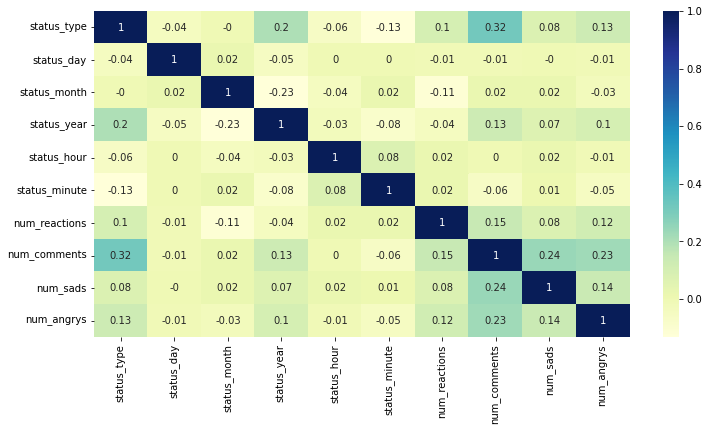

In [ ]:
plt.figure(figsize=(12,6))
df_new = df_processed.drop(['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_shares'], axis=1)
sns.heatmap(np.round(df_new.corr(),2), robust=True, annot=True, cmap="YlGnBu")
plt.show()

**We can now proceed to next tasks**

### **Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [ ]:
# Perform MinMax Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns, index=df_new.index)
df_scaled.sample(6)

,status_type,status_day,status_month,status_year,status_hour,status_minute,num_reactions,num_comments,num_sads,num_angrys
status_id,,,,,,,,,,
4469,0.333333,0.133333,0.909091,0.833333,0.869565,1.000000,0.002123,0.000048,0.0,0.0
6598,0.666667,0.666667,1.000000,0.833333,0.000000,0.254237,0.004246,0.000000,0.0,0.0
2613,0.333333,0.500000,0.545455,0.000000,0.956522,0.050847,0.002760,0.000143,0.0,0.0
1678,0.333333,0.566667,0.818182,0.166667,0.130435,0.084746,0.019745,0.000381,0.0,0.0
419,0.333333,0.333333,0.000000,0.833333,1.000000,0.983051,0.048832,0.000381,0.0,0.0
5099,0.333333,0.733333,0.363636,1.000000,0.956522,0.779661,0.001699,0.000000,0.0,0.0


Now we will determine the number of clusters we need.

In [ ]:
@lru_cache(None)
def find_k(max_cluster=10):
  cluster_score = OrderedDict()
  sil_score = OrderedDict()
  df_numpied = df_scaled.to_numpy()

  for k in range(2, max_cluster + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_numpied)
    labels = kmeans.labels_
    cluster_score[k] = np.round(kmeans.inertia_, 4)
    sil_score[k] = np.round(silhouette_score(df_numpied, labels, metric = 'euclidean'), 4)
  knee = KneeLocator(list(cluster_score.keys()), list(cluster_score.values()), direction='decreasing', curve='convex')
  return cluster_score, sil_score, knee.knee

cluster_score, sil_score, knee = find_k(35)
print(knee)

9


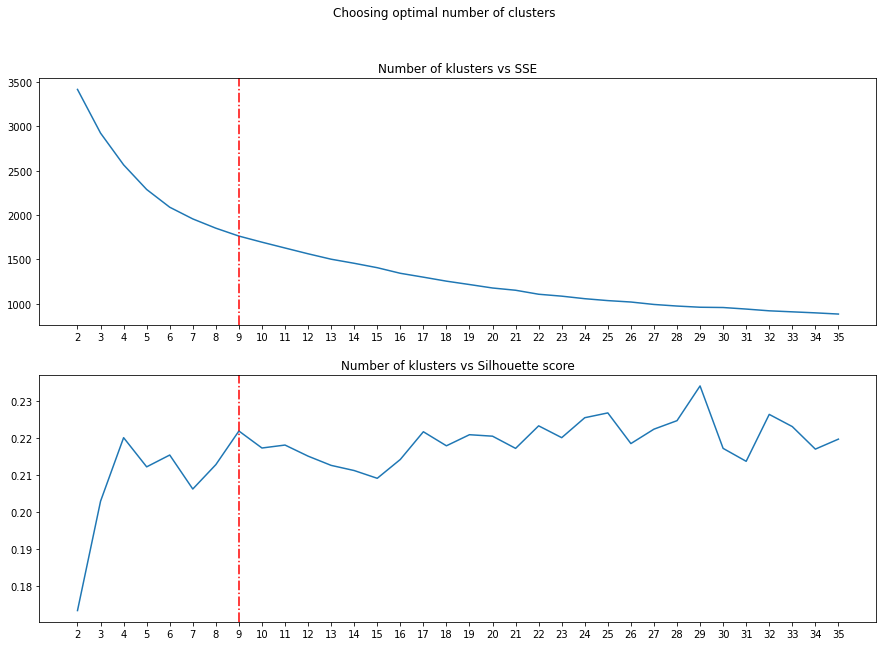

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
fig.suptitle('Choosing optimal number of clusters')
ax[0].plot(list(cluster_score.keys()), list(cluster_score.values()))
ax[0].set_title('Number of klusters vs SSE')
ax[0].axvline(x = knee, linestyle="-.", color='r')
ax[0].xaxis.set_ticks(list(cluster_score.keys()))
ax[1].plot(list(sil_score.keys()), list(sil_score.values()))
ax[1].set_title('Number of klusters vs Silhouette score')
ax[1].xaxis.set_ticks(list(sil_score.keys()))
ax[1].axvline(x = knee, linestyle="-.", color='r')
plt.show()

From the plots, we observe the 9 is at the elbow. However, it's hard to say it is the optimal number of cluster as it doesn't have maximum silhouette score (but is close enough).

In [ ]:
model = KMeans(n_clusters = knee)
model.fit(df_scaled)
preds = model.predict(df_scaled)
df_scaled['clusters'] = preds
df_scaled.sample(6)

,status_type,status_day,status_month,status_year,status_hour,status_minute,num_reactions,num_comments,num_sads,num_angrys,clusters
status_id,,,,,,,,,,,
3572,0.333333,0.933333,0.727273,0.833333,0.956522,0.186441,0.007856,0.000143,0.000000,0.000000,6
4543,1.000000,0.300000,0.363636,1.000000,0.260870,0.016949,0.342038,0.110243,0.039216,0.000000,3
4535,1.000000,0.433333,0.363636,1.000000,0.347826,0.644068,0.329936,0.104097,0.058824,0.064516,5
5399,1.000000,0.833333,0.090909,1.000000,0.043478,0.067797,0.031635,0.020438,0.000000,0.000000,3
5630,1.000000,0.933333,1.000000,0.833333,0.043478,0.186441,0.008280,0.000000,0.000000,0.000000,7
1489,0.333333,0.433333,0.090909,0.333333,0.130435,0.118644,0.044798,0.000095,0.000000,0.000000,2


In [ ]:
X = df_scaled.drop(['clusters'], axis=1)
y = df_scaled.clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) # cross validation to verify optimal number of clusters
model = KMeans(n_clusters = knee)
model.fit(X_train, y_train)
preds = model.predict(X_test)
adjusted_rand_score(y_test, preds), rand_score(y_test, preds)

(0.9165861404267944, 0.9828992089250407)

We observe that we got a score of nearly 1 both the times so 9 is the optimal number of clusters.